In [1]:
# importing libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset
salary_df = pd.read_csv('Salary Data.csv')
salary_df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.0,Male,Bachelor's,Software Engineer,5.0,90000.0
1,28.0,Female,Master's,Data Analyst,3.0,65000.0
2,45.0,Male,PhD,Senior Manager,15.0,150000.0
3,36.0,Female,Bachelor's,Sales Associate,7.0,60000.0
4,52.0,Male,Master's,Director,20.0,200000.0


In [3]:
#statistical summary
salary_df.describe()

,Age,Years of Experience,Salary
count,373.000000,373.000000,373.000000
mean,37.431635,10.030831,100577.345845
std,7.069073,6.557007,48240.013482
min,23.000000,0.000000,350.000000
25%,31.000000,4.000000,55000.000000
50%,36.000000,9.000000,95000.000000
75%,44.000000,15.000000,140000.000000
max,53.000000,25.000000,250000.000000


In [4]:
salary_df.rename(columns = {'Age':'age','Gender':'gender','Education Level':'education_level','Job Title':'job_title','Years of Experience':'year_of_experience'},inplace = True)

In [5]:
#overall's data information
salary_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   age                 373 non-null    float64
 1   gender              373 non-null    object 
 2   education_level     373 non-null    object 
 3   job_title           373 non-null    object 
 4   year_of_experience  373 non-null    float64
 5   Salary              373 non-null    float64
dtypes: float64(3), object(3)
memory usage: 17.7+ KB


In [6]:
#dropping 'gender' and 'age' column since the dont constitute in one's salary
salary_df.drop(columns=['gender','age'],inplace = True)

In [7]:
salary_df['job_title'].value_counts()

Director of Marketing              12
Director of Operations             11
Senior Business Analyst            10
Senior Marketing Analyst            9
Senior Marketing Manager            9
                                   ..
Business Development Manager        1
Customer Service Representative     1
IT Manager                          1
Digital Marketing Manager           1
Junior Web Developer                1
Name: job_title, Length: 174, dtype: int64

In [8]:
#dropping null values
salary_df = salary_df.dropna()

In [9]:
salary_df['job_title'].value_counts().index

Index(['Director of Marketing', 'Director of Operations',
       'Senior Business Analyst', 'Senior Marketing Analyst',
       'Senior Marketing Manager', 'Junior Business Analyst',
       'Senior Financial Analyst', 'Junior Financial Analyst',
       'Junior Business Development Associate', 'Senior Project Manager',
       ...
       'Human Resources Director', 'Creative Director',
       'Technical Support Specialist', 'Research Director', 'Web Developer',
       'Business Development Manager', 'Customer Service Representative',
       'IT Manager', 'Digital Marketing Manager', 'Junior Web Developer'],
      dtype='object', length=174)

### Shortening the 'title' category

In [10]:
def shorten_cat(categories,cuttoff):
    map = {}
    for i in range(len(categories)):
        if categories.values[i] >=cuttoff:
            map[categories.index[i]] = categories.index[i]
        else:
            map[categories.index[i]] = 'Other'
    return map

In [11]:
salary_df['job_title'] = salary_df['job_title'].map(shorten_cat(salary_df['job_title'].value_counts(),3))

In [12]:
salary_df['job_title'].value_counts()

Other                                    163
Director of Marketing                     12
Director of Operations                    11
Senior Business Analyst                   10
Senior Marketing Manager                   9
Senior Marketing Analyst                   9
Junior Business Analyst                    8
Junior Business Development Associate      7
Senior Data Scientist                      7
Junior Financial Analyst                   7
Senior Financial Analyst                   7
Senior Project Manager                     7
Junior Marketing Coordinator               6
Senior Software Engineer                   6
Senior Product Manager                     6
Senior Operations Manager                  5
Junior Operations Analyst                  5
Junior Marketing Specialist                5
Junior Project Manager                     5
Senior Project Coordinator                 5
Senior Product Designer                    5
Senior Financial Manager                   5
Senior Mar

### Dropping duplicates

In [13]:
salary_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
370     True
371     True
372     True
373     True
374     True
Length: 373, dtype: bool

In [14]:
salary_df = salary_df.drop_duplicates()

In [15]:
salary_df = salary_df[salary_df['job_title'] != 'Other']

In [17]:
#years of experince should be in int form
salary_df['year_of_experience'] = salary_df['year_of_experience'].astype(int)
salary_df['year_of_experience'].values

array([ 4,  1, 10, 16, 11,  9, 23, 21,  1, 18,  6, 21,  6, 25, 19, 13, 14,
        6,  0,  6, 10, 17, 25,  5, 16,  2,  4,  8, 21,  1, 19,  4,  2, 13,
        1,  8, 16,  4, 11, 18,  9,  5,  7,  7,  1,  9,  2, 16, 18,  4, 20,
        2,  9, 15,  2,  8,  1,  7, 11, 17,  9, 10, 15,  2,  8, 14,  6,  9,
       22, 19,  2, 11, 18,  5,  3, 15, 13,  3,  9, 16,  5, 10, 18,  1, 10,
       19,  6,  8, 21,  3, 11, 10,  3, 12,  1,  8,  4,  9, 16,  4,  8, 20,
        9, 17,  5,  8, 21,  3,  9,  4, 13,  4, 10, 21,  2,  7, 14,  4, 12,
       16,  9,  3,  9,  5,  8, 12,  6, 10, 16, 12,  2,  9, 15,  3,  3, 12,
       16,  4,  8, 19,  2,  7, 15,  5,  8, 18, 14, 16,  1,  8])

In [18]:
salary_df['job_title'].nunique()

40

In [19]:
salary_df.head()

,education_level,job_title,year_of_experience,Salary
7,Bachelor's,Sales Manager,4,80000.0
8,Bachelor's,Marketing Coordinator,1,45000.0
9,PhD,Senior Scientist,10,110000.0
47,Master's,Director of Marketing,16,180000.0
48,PhD,Senior Scientist,11,120000.0


### Let's check for outliers

<Axes: xlabel='year_of_experience'>

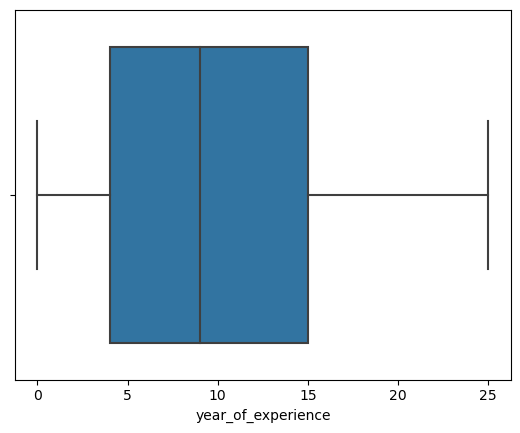

In [20]:
sns.boxplot(x = salary_df['year_of_experience'])

<Axes: xlabel='Salary'>

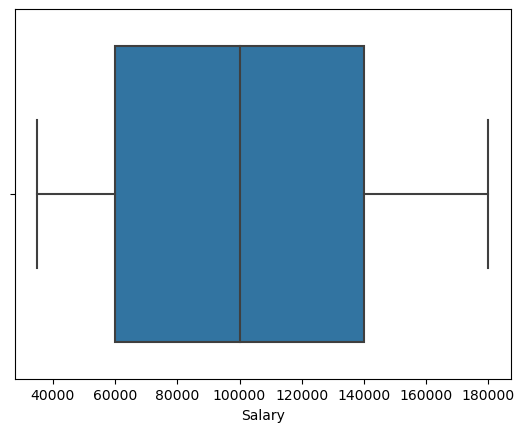

In [21]:
sns.boxplot(x = salary_df['Salary'])

(array([20., 19., 19., 25., 18.,  8., 18., 11.,  9.,  3.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <BarContainer object of 10 artists>)

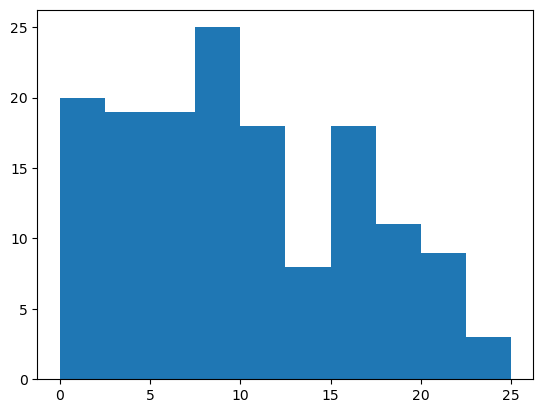

In [22]:
plt.hist(x = salary_df['year_of_experience'])

In [23]:
salary_df.shape

(150, 4)

In [24]:
salary_df['year_of_experience'].values

array([ 4,  1, 10, 16, 11,  9, 23, 21,  1, 18,  6, 21,  6, 25, 19, 13, 14,
        6,  0,  6, 10, 17, 25,  5, 16,  2,  4,  8, 21,  1, 19,  4,  2, 13,
        1,  8, 16,  4, 11, 18,  9,  5,  7,  7,  1,  9,  2, 16, 18,  4, 20,
        2,  9, 15,  2,  8,  1,  7, 11, 17,  9, 10, 15,  2,  8, 14,  6,  9,
       22, 19,  2, 11, 18,  5,  3, 15, 13,  3,  9, 16,  5, 10, 18,  1, 10,
       19,  6,  8, 21,  3, 11, 10,  3, 12,  1,  8,  4,  9, 16,  4,  8, 20,
        9, 17,  5,  8, 21,  3,  9,  4, 13,  4, 10, 21,  2,  7, 14,  4, 12,
       16,  9,  3,  9,  5,  8, 12,  6, 10, 16, 12,  2,  9, 15,  3,  3, 12,
       16,  4,  8, 19,  2,  7, 15,  5,  8, 18, 14, 16,  1,  8])

(array([20., 19., 19., 25., 18.,  8., 18., 11.,  9.,  3.]),
 array([ 0. ,  2.5,  5. ,  7.5, 10. , 12.5, 15. , 17.5, 20. , 22.5, 25. ]),
 <BarContainer object of 10 artists>)

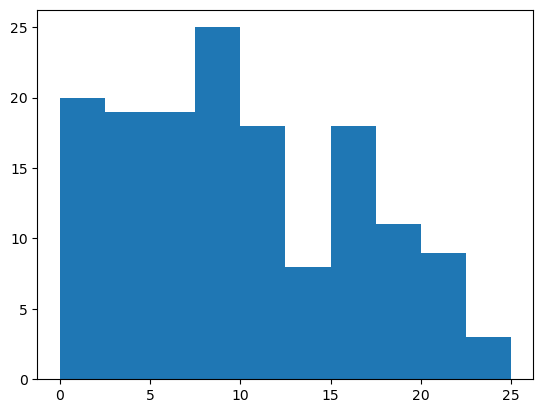

In [25]:
plt.hist(x = salary_df['year_of_experience'])

In [26]:
salary_df['job_title'].unique()

array(['Sales Manager', 'Marketing Coordinator', 'Senior Scientist',
       'Director of Marketing', 'Director of Operations',
       'Senior Data Scientist', 'Junior Accountant',
       'Senior Financial Analyst', 'Senior Software Engineer',
       'Senior Project Manager', 'Senior Marketing Manager',
       'Senior HR Manager', 'Senior Project Coordinator',
       'Senior Marketing Analyst', 'Senior Business Analyst',
       'Junior Marketing Analyst', 'Senior Product Manager',
       'Junior Operations Analyst', 'Senior Software Developer',
       'Junior Sales Representative', 'Junior Marketing Manager',
       'Junior Business Analyst', 'Junior Marketing Specialist',
       'Junior Project Manager', 'Senior Business Development Manager',
       'Senior Product Designer', 'Junior Financial Analyst',
       'Senior Operations Manager', 'Senior Marketing Coordinator',
       'Junior Business Development Associate',
       'Junior Marketing Coordinator', 'Senior UX Designer',
       '

In [27]:
salary_df['education_level'].unique()

array(["Bachelor's", 'PhD', "Master's"], dtype=object)

In [29]:
salary_df.head()

,education_level,job_title,year_of_experience,Salary
7,Bachelor's,Sales Manager,4,80000.0
8,Bachelor's,Marketing Coordinator,1,45000.0
9,PhD,Senior Scientist,10,110000.0
47,Master's,Director of Marketing,16,180000.0
48,PhD,Senior Scientist,11,120000.0


In [30]:
from sklearn.preprocessing import LabelEncoder

In [31]:
salary_df['education_level'].value_counts()

Bachelor's    91
Master's      36
PhD           23
Name: education_level, dtype: int64

In [32]:
salary_df['education_level'] = salary_df['education_level'].map({"Bachelor's":2,"Master's":1,"PhD":0})

In [33]:
le_job = LabelEncoder()
salary_df['job_title'] = le_job.fit_transform(salary_df['job_title'])

In [34]:
salary_df['job_title'].unique()

array([16, 15, 36,  0,  1, 21,  2, 23, 38, 35, 28, 25, 34, 26, 17,  6, 33,
       10, 37, 14,  8,  3,  9, 13, 18, 32,  5, 31, 27,  4,  7, 39, 12, 29,
       19, 22, 11, 24, 20, 30])

In [35]:
salary_df.isna().sum()

education_level       0
job_title             0
year_of_experience    0
Salary                0
dtype: int64

### Creating dependent and independent variables and model building

In [36]:
X = salary_df.drop(columns = ['Salary'])
y = salary_df['Salary']

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV

In [38]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.35, random_state = 0)

In [39]:
#data scaling
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [40]:
X_train

array([[1.        , 0.25641026, 0.16666667],
       [1.        , 0.20512821, 0.16666667],
       [1.        , 0.17948718, 0.08333333],
       [0.5       , 0.02564103, 0.83333333],
       [1.        , 0.84615385, 0.54166667],
       [0.5       , 0.02564103, 0.79166667],
       [0.        , 0.51282051, 0.625     ],
       [0.        , 0.48717949, 0.75      ],
       [0.5       , 0.8974359 , 0.75      ],
       [0.5       , 0.        , 0.79166667],
       [1.        , 0.35897436, 0.        ],
       [1.        , 0.66666667, 0.29166667],
       [1.        , 0.12820513, 0.08333333],
       [1.        , 0.61538462, 0.375     ],
       [1.        , 0.8974359 , 0.45833333],
       [0.        , 0.71794872, 0.70833333],
       [0.5       , 0.71794872, 1.        ],
       [1.        , 0.30769231, 0.125     ],
       [1.        , 0.74358974, 0.29166667],
       [0.5       , 0.84615385, 0.375     ],
       [0.5       , 0.87179487, 0.5       ],
       [0.5       , 0.43589744, 0.33333333],
       [0.

In [41]:
from sklearn.preprocessing import PowerTransformer
power = PowerTransformer(method = 'yeo-johnson')

In [42]:
power.fit(X_train)
X_trainp = power.transform(X_train)
X_testp = power.transform(X_test)

In [45]:
linearp = LinearRegression()
linearp.fit(X_trainp,y_train)
linearp_pred = linearp.predict(X_testp)
error = np.sqrt(mean_squared_error(y_test,linearp_pred))
error

9519.728358886796

In [46]:
print(r2_score(y_test,linearp_pred))

0.945624669608402


## Model hyperparameter tuning

In [47]:
rf = RandomForestRegressor()
reg = GridSearchCV(rf,{'n_estimators':[10,15,20],'criterion':['friedman_mse', 'squared_error', 'poisson']},cv = 5,return_train_score = False)

In [48]:
reg.fit(X_trainp,y_train)
reg.cv_results_

{'mean_fit_time': array([0.05306935, 0.02187357, 0.04374347, 0.02187347, 0.01874943,
        0.04244266, 0.04356904, 0.03965678, 0.04133344]),
 'std_fit_time': array([0.06736093, 0.00765456, 0.00625044, 0.00765366, 0.00625064,
        0.00590547, 0.03709242, 0.00609958, 0.01275269]),
 'mean_score_time': array([0.00624981, 0.00624948, 0.00312467, 0.        , 0.00624914,
        0.00396585, 0.00214386, 0.        , 0.0062499 ]),
 'std_score_time': array([0.00765442, 0.00765401, 0.00624933, 0.        , 0.0076536 ,
        0.00634972, 0.00308852, 0.        , 0.00765454]),
 'param_criterion': masked_array(data=['friedman_mse', 'friedman_mse', 'friedman_mse',
                    'squared_error', 'squared_error', 'squared_error',
                    'poisson', 'poisson', 'poisson'],
              mask=[False, False, False, False, False, False, False, False,
                    False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[10, 15, 20, 10, 

In [49]:
pd.DataFrame(reg.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.053069,0.067361,0.006250,0.007654,friedman_mse,10,"{'criterion': 'friedman_mse', 'n_estimators': 10}",0.941089,0.884078,0.913551,0.941902,0.889408,0.914005,0.024547,2
1,0.021874,0.007655,0.006249,0.007654,friedman_mse,15,"{'criterion': 'friedman_mse', 'n_estimators': 15}",0.909715,0.856277,0.929290,0.939333,0.896363,0.906196,0.029094,7
2,0.043743,0.006250,0.003125,0.006249,friedman_mse,20,"{'criterion': 'friedman_mse', 'n_estimators': 20}",0.927562,0.874268,0.918335,0.932825,0.894350,0.909468,0.021996,4
3,0.021873,0.007654,0.000000,0.000000,squared_error,10,"{'criterion': 'squared_error', 'n_estimators':...",0.920782,0.849881,0.930482,0.950650,0.885597,0.907479,0.035683,6
4,0.018749,0.006251,0.006249,0.007654,squared_error,15,"{'criterion': 'squared_error', 'n_estimators':...",0.930714,0.876842,0.933072,0.943814,0.900641,0.917017,0.024681,1
5,0.042443,0.005905,0.003966,0.006350,squared_error,20,"{'criterion': 'squared_error', 'n_estimators':...",0.914472,0.866696,0.929642,0.948585,0.892543,0.910388,0.028544,3
6,0.043569,0.037092,0.002144,0.003089,poisson,10,"{'criterion': 'poisson', 'n_estimators': 10}",0.920950,0.861283,0.906978,0.931494,0.890729,0.902287,0.024651,8
7,0.039657,0.006100,0.000000,0.000000,poisson,15,"{'criterion': 'poisson', 'n_estimators': 15}",0.923599,0.855361,0.910862,0.920494,0.892775,0.900618,0.025051,9
8,0.041333,0.012753,0.006250,0.007655,poisson,20,"{'criterion': 'poisson', 'n_estimators': 20}",0.927110,0.842306,0.922128,0.943839,0.906769,0.908430,0.035116,5


In [50]:
model2 = RandomForestRegressor(n_estimators = 15,criterion = 'squared_error')
model2.fit(X_trainp,y_train)
y_pred = model2.predict(X_testp)

In [51]:
print(r2_score(y_test,y_pred))

0.9424006247863177


In [52]:
error = np.sqrt(mean_squared_error(y_test,y_pred))
error

9797.888391615033

In [53]:
x = ["Master's","Senior Software Engineer",4]
x

["Master's", 'Senior Software Engineer', 4]

In [54]:
if x[0] == "Bachelor's":
    x[0] = 2
if x[0] == "Master's":
    x[0] = 1
if x[0] == 'PhD':
    x[0] =0

In [58]:
x = np.array(x)

In [63]:
x = x.reshape(1,-1)

In [64]:
x

array([['1', 'Senior Software Engineer', '4']], dtype='<U24')

In [65]:
x[:,1] = le_job.transform(x[:,1])


In [68]:
x = x.astype(int)
x

array([[ 1, 38,  4]])

In [69]:
linearp.predict(x)

array([260628.45474612])

In [70]:
import pickle
data = {'model':linearp,'le_job':le_job}
with open('salary.pkl','wb') as file:
    pickle.dump(data,file)